In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

%matplotlib inline

## Helpful Plotting Functions

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     size = 16)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     size = 16)

    ax = plt.subplot()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(22) # Size here overrides font_prop
    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), size = 16)
#     plt.savefig("confusion_matrices/" + title + ".pdf", format = "pdf", bbox_inches = 'tight')

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize= (12, 10))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", size = 16)
    plt.ylabel("Error", size = 16)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_error = 1 - train_scores
    test_error = 1 - test_scores
    train_error_mean = np.mean(train_error, axis=1)
    train_error_std = np.std(train_error, axis=1)
    test_error_mean = np.mean(test_error, axis=1)
    test_error_std = np.std(test_error, axis=1)
    print ("Training Error: " + str(train_error_mean[-1]))
    print ("Testing Error std: " + str(test_error_std[-1]))
    print ("Testing Error: " + str(test_error_mean[-1]))
#     cv_scores.append(test_error[-1])
    ax = plt.subplot()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(22) # Size here overrides font_prop

    plt.fill_between(train_sizes, train_error_mean - train_error_std,
                     train_error_mean + train_error_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_error_mean - test_error_std,
                     test_error_mean + test_error_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_error_mean, 'o-', color="r",
             label="Training Error")
    plt.plot(train_sizes, test_error_mean, 'o-', color="g",
             label="Cross-validation Error")
    plt.grid()
    plt.legend(loc="best", prop={'size': 13})
#     plt.savefig("loss_curves/" + title + ".pdf", format = "pdf", bbox_inches = 'tight')
#     plt.savefig("loss_curves/" + title + ".png")
#     return plt


In [4]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
def train_test_loss(clf, classifier_name, X , y):
    plot_learning_curve(clf, classifier_name, X, y, cv=cv)

In [364]:
train_1 = pd.read_csv("../data/Train1.csv")
train_2 = pd.read_csv("../data/Train2.csv")
test_1 = pd.read_csv("../data/Test1.csv")
test_2 = pd.read_csv("../data/Test2.csv")
ans_1 = pd.read_excel("../data/Answer1.xlsx")
ans_2 = pd.read_excel("../data/Answer2.xlsx")

In [365]:
import keyword
train_1.columns = train_1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_').map(lambda x: 'x'+x if x in keyword.kwlist else x )

In [366]:
train_2.head()

,TESTID,WellID,DepthMD,DepthTVDSS,Temp,GR,Resist_deep,Resist_medium,Resist_short,Density,Neutron,FluidType,Subblock,Thickness,Reservior,Mobility
0,14,Well2,2399.5,2227.325057,94.23,44.7551,2.5318,2.6355,3.4361,2.2565,0.25493,W,I,9.711914,b4,249.47
1,15,Well2,2466.0,2279.336933,96.30,45.7771,2.7585,3.0652,4.1357,2.3057,0.22530,W,I,7.714600,b4,209.71
2,20,Well2,2783.3,2528.831697,106.67,44.6048,61.4907,56.0720,40.5391,2.3343,0.19250,O,J,3.217773,c1,63.87
3,21,Well2,2785.7,2530.706846,107.13,46.3183,68.5310,53.6928,52.8867,2.3347,0.21244,O,J,3.217773,c1,24.20
4,22,Well2,2789.2,2533.441439,107.62,51.9686,26.9497,34.2738,31.1757,2.3823,0.19515,O,J,1.548828,c1,2.12


In [367]:
train_2.columns = train_2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_').map(lambda x: 'x'+x if x in keyword.kwlist else x )

In [368]:
train_1["wellid"] = train_1["wellid"].apply(lambda x: x.replace("Well",""))
train_2["wellid"] = train_2["wellid"].apply(lambda x: x.replace("Well",""))

In [369]:
train_1.head()

,testid,wellid,depthmd,depthtvdss,temp,gr,resist_deep,resist_medium,resist_short,density,neutron,fluidtype,subblock,thickness,reservior,rft
0,1,1,2396.0,2339.352479,98.333333,61.1566,4.8709,NaN,NaN,2.4225,0.220645,W,I,2.131592,c1,NORMAL
1,2,1,2405.5,2348.842594,96.666667,41.4605,3.4001,NaN,NaN,2.3553,0.259623,W,I,1.826904,c1,NORMAL
2,3,1,2414.5,2357.831398,96.666667,48.0889,4.8935,NaN,NaN,2.4062,0.230475,W,I,2.283203,c1,NORMAL
3,4,1,2420.5,2363.823933,96.634300,51.8755,14.2538,NaN,NaN,2.3354,0.255957,W,I,1.978516,c1,NORMAL
4,5,1,2463.0,2406.251473,99.444444,53.7886,8.1284,NaN,NaN,2.4324,0.168315,W,I,1.673096,c2,NORMAL


In [370]:
train_2.head()

,testid,wellid,depthmd,depthtvdss,temp,gr,resist_deep,resist_medium,resist_short,density,neutron,fluidtype,subblock,thickness,reservior,mobility
0,14,2,2399.5,2227.325057,94.23,44.7551,2.5318,2.6355,3.4361,2.2565,0.25493,W,I,9.711914,b4,249.47
1,15,2,2466.0,2279.336933,96.30,45.7771,2.7585,3.0652,4.1357,2.3057,0.22530,W,I,7.714600,b4,209.71
2,20,2,2783.3,2528.831697,106.67,44.6048,61.4907,56.0720,40.5391,2.3343,0.19250,O,J,3.217773,c1,63.87
3,21,2,2785.7,2530.706846,107.13,46.3183,68.5310,53.6928,52.8867,2.3347,0.21244,O,J,3.217773,c1,24.20
4,22,2,2789.2,2533.441439,107.62,51.9686,26.9497,34.2738,31.1757,2.3823,0.19515,O,J,1.548828,c1,2.12


In [371]:
def clean(df):
    train1 = df 
    a_mask = train1['reservior'] == 'a' 
    b_mask = train1['reservior'].isin(['b1','b2','b3']).astype(int) 
    c_mask = train1['reservior'].isin(['c1','c2','c3']).astype(int) 
    d_mask = train1['reservior'] == 'd' 
    e_mask = train1['reservior'] == 'e' 
    f_mask = train1['reservior'] == 'f' 

    simple = list('adef') 
    for c in simple: 
        if c in train1.columns.tolist(): 
            train1 = train1.drop(c,axis=1) 
        mask = train1['reservior'] == c 
        train1.insert(1,c,value=a_mask) 
        train1[c] = train1[c].apply(lambda x: 1 if x else 0) 

    for m in ['b','c']: 
        if m in train1.columns.tolist(): 
            train1 = train1.drop(m,axis=1) 
        train1.insert(1,m,value=0) 
        for i in range(1,4): 
            mask = train1['reservior']==str(m)+str(i) 
            train1[m][mask] = i 
    return train1.drop(["reservior"], axis = 1)

In [372]:
df = clean(train_1)
df_2 = clean(train_2)
df = df.dropna()
df_2 = df_2.dropna()

/home/sanchit/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [373]:
# df['fluidtype'] = df['fluidtype'].map({'W':3,'O':1,"O?":2,'G':0,np.NAN: np.NAN}) 
df['rft'] = df['rft'].map({'NORMAL':1,'OTHER':0}) 
df['wellid'] = df['wellid'].map(lambda x: int(x.replace('Well',''))) 

In [374]:
# df_2['fluidtype'] = df_2['fluidtype'].map({'W':0,'O':1,"O?":2,'G':3,np.NAN: np.NAN}) 
df_2['wellid'] = df_2['wellid'].map(lambda x: int(x.replace('Well',''))) 

In [375]:
df_2.columns

Index(['testid', 'c', 'b', 'f', 'e', 'd', 'a', 'wellid', 'depthmd',
       'depthtvdss', 'temp', 'gr', 'resist_deep', 'resist_medium',
       'resist_short', 'density', 'neutron', 'fluidtype', 'subblock',
       'thickness', 'mobility'],
      dtype='object')

In [376]:
df = pd.get_dummies(data=df, columns=['fluidtype', 'subblock'])
# df_2 = df_2.drop(["testid", "resist_deep", "resist_medium", "neutron", "fluidtype", "subblock"], axis = 1)

In [377]:
df_2.head()

,testid,c,b,f,e,d,a,wellid,depthmd,depthtvdss,...,gr,resist_deep,resist_medium,resist_short,density,neutron,fluidtype,subblock,thickness,mobility
0,14,0,0,0,0,0,0,2,2399.5,2227.325057,...,44.7551,2.5318,2.6355,3.4361,2.2565,0.25493,W,I,9.711914,249.47
1,15,0,0,0,0,0,0,2,2466.0,2279.336933,...,45.7771,2.7585,3.0652,4.1357,2.3057,0.22530,W,I,7.714600,209.71
2,20,1,0,0,0,0,0,2,2783.3,2528.831697,...,44.6048,61.4907,56.0720,40.5391,2.3343,0.19250,O,J,3.217773,63.87
3,21,1,0,0,0,0,0,2,2785.7,2530.706846,...,46.3183,68.5310,53.6928,52.8867,2.3347,0.21244,O,J,3.217773,24.20
4,22,1,0,0,0,0,0,2,2789.2,2533.441439,...,51.9686,26.9497,34.2738,31.1757,2.3823,0.19515,O,J,1.548828,2.12


In [378]:
df_2.columns

Index(['testid', 'c', 'b', 'f', 'e', 'd', 'a', 'wellid', 'depthmd',
       'depthtvdss', 'temp', 'gr', 'resist_deep', 'resist_medium',
       'resist_short', 'density', 'neutron', 'fluidtype', 'subblock',
       'thickness', 'mobility'],
      dtype='object')

In [379]:
len(df)

746

In [380]:
len(df_2)

607

In [381]:
plot_df = df.dropna()
len(plot_df)

746

In [382]:
y = plot_df["rft"]
y_2 = df_2["mobility"]

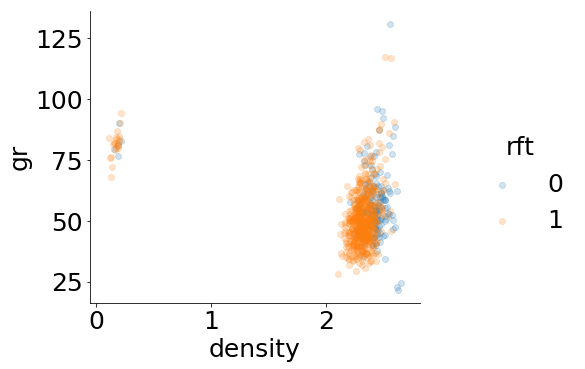

In [383]:
import seaborn as sns
sns.lmplot('density', 'gr', plot_df, hue='rft', fit_reg=False, scatter_kws={'alpha':0.2})
fig = plt.gcf()
fig.set_size_inches(10, 6)

(2, 3)

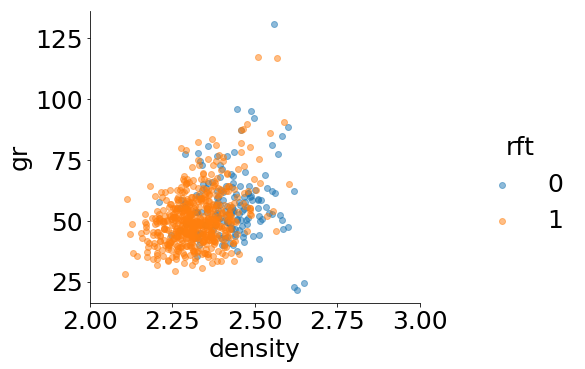

In [384]:
sns.lmplot('density', 'gr', plot_df, hue='rft', fit_reg=False, scatter_kws={'alpha':0.5})
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlim(2, 3)

(0, 0.4)

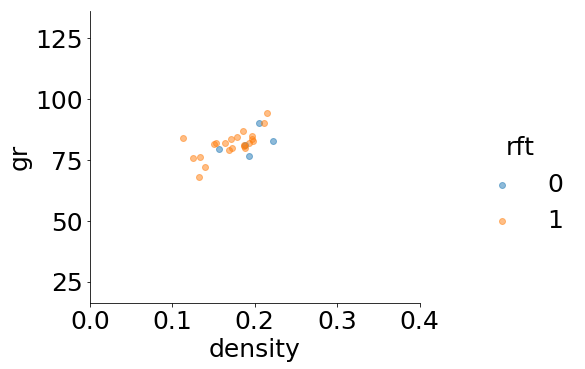

In [385]:
sns.lmplot('density', 'gr', plot_df, hue='rft', fit_reg=False, scatter_kws={'alpha':0.5})
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlim(0, 0.4)

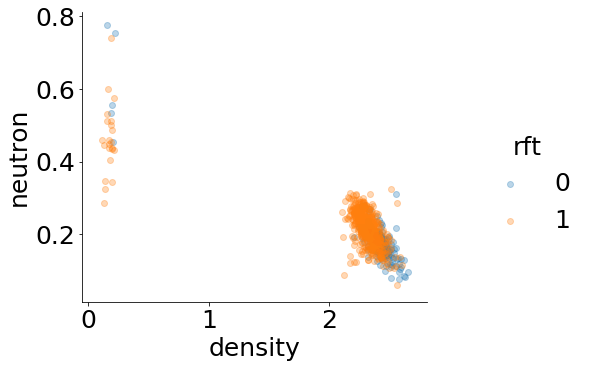

In [386]:
sns.lmplot('density', 'neutron', plot_df, hue='rft', fit_reg=False, scatter_kws={'alpha':0.3})
fig = plt.gcf()
fig.set_size_inches(10, 6)

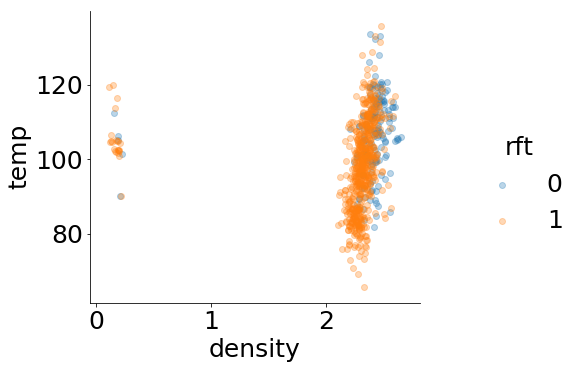

In [387]:
sns.lmplot('density', 'temp', plot_df, hue='rft', fit_reg=False, scatter_kws={'alpha':0.3})
fig = plt.gcf()
fig.set_size_inches(10, 6)

In [388]:
plot_df.drop("rft", axis =1, inplace=True)

In [389]:
# df_2.drop("mobility", axis =1, inplace=True)

In [390]:
plot_df.head()

,testid,c,b,f,e,d,a,wellid,depthmd,depthtvdss,...,subblock_J,subblock_K,subblock_L,subblock_M,subblock_N,subblock_O,subblock_P,subblock_Q,subblock_R,subblock_S
10,11,0,0,0,0,0,0,2,2337.2,2177.570437,...,0,0,0,0,0,0,0,0,0,0
11,12,0,0,0,0,0,0,2,2374.8,2207.828382,...,0,0,0,0,0,0,0,0,0,0
12,14,0,0,0,0,0,0,2,2399.5,2227.325057,...,0,0,0,0,0,0,0,0,0,0
13,15,0,0,0,0,0,0,2,2466.0,2279.336933,...,0,0,0,0,0,0,0,0,0,0
14,24,2,0,0,0,0,0,2,2849.2,2580.365167,...,1,0,0,0,0,0,0,0,0,0


In [391]:
df_2.head()

,testid,c,b,f,e,d,a,wellid,depthmd,depthtvdss,...,gr,resist_deep,resist_medium,resist_short,density,neutron,fluidtype,subblock,thickness,mobility
0,14,0,0,0,0,0,0,2,2399.5,2227.325057,...,44.7551,2.5318,2.6355,3.4361,2.2565,0.25493,W,I,9.711914,249.47
1,15,0,0,0,0,0,0,2,2466.0,2279.336933,...,45.7771,2.7585,3.0652,4.1357,2.3057,0.22530,W,I,7.714600,209.71
2,20,1,0,0,0,0,0,2,2783.3,2528.831697,...,44.6048,61.4907,56.0720,40.5391,2.3343,0.19250,O,J,3.217773,63.87
3,21,1,0,0,0,0,0,2,2785.7,2530.706846,...,46.3183,68.5310,53.6928,52.8867,2.3347,0.21244,O,J,3.217773,24.20
4,22,1,0,0,0,0,0,2,2789.2,2533.441439,...,51.9686,26.9497,34.2738,31.1757,2.3823,0.19515,O,J,1.548828,2.12


In [392]:
"True Positive Rate:", len (y[y == 1]) / (len (y[y == 1]) + len (y[y == 0])) * 100 

('True Positive Rate:', 78.68632707774799)

In [393]:
"False Positive Rate:", len (y[y == 0]) / (len (y[y == 1]) + len (y[y == 0])) * 100 

('False Positive Rate:', 21.31367292225201)

## Part I

In [80]:
X_train, X_test, y_train, y_test = train_test_split(plot_df, y, test_size=0.20, random_state = 437)

## Modeling

In [88]:
names = [
    "AdaBoost"
]
classifier_list = [
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=10,learning_rate=0.1,algorithm="SAMME")
]

In [89]:
for name, clf in zip(names, classifier_list):
    print (name)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
#     print ("Training Accuracy: ",accuracy_score(pred_train, y_train))
    print ("Testing Accuracy: ", accuracy_score(pred_test, y_test))
#     print (" ")
#     train_test_loss(clf, name, plot_df , y)
    print (" ")

AdaBoost
Testing Accuracy:  0.8333333333333334
 


600


Text(0.5, 0, 'Number of Trees')

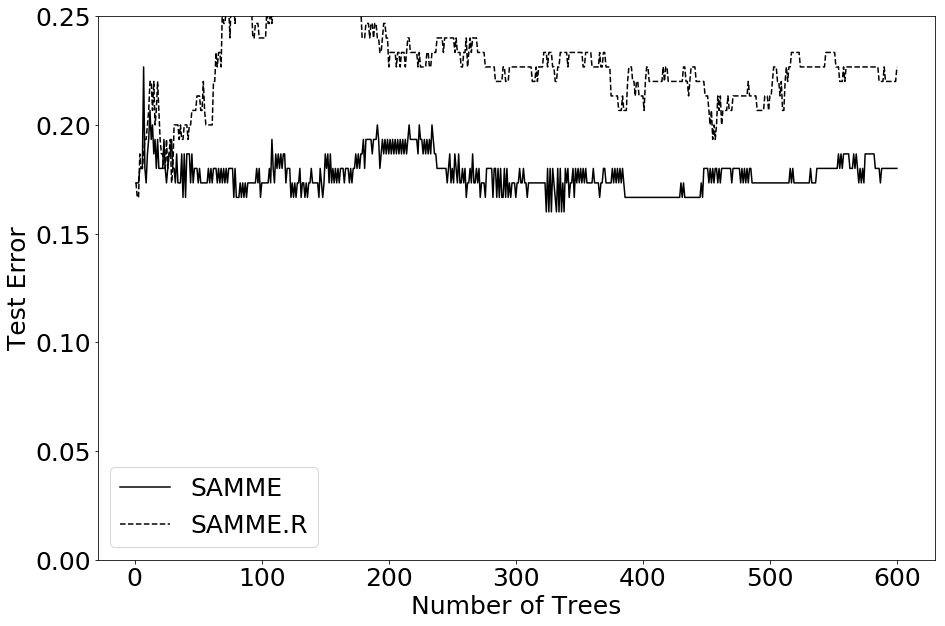

In [90]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)
print (n_trees_discrete)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 10))
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.0, 0.25)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

# plt.subplot(132)
# plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
#          "b", label='SAMME', alpha=.5)
# plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
#          "r", label='SAMME.R', alpha=.5)
# plt.legend()
# plt.ylabel('Error')
# plt.xlabel('Number of Trees')
# plt.ylim((.2,
#          max(real_estimator_errors.max(),
#              discrete_estimator_errors.max()) * 1.2))
# plt.xlim((-20, len(bdt_discrete) + 20))

# plt.subplot(133)
# plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
#          "b", label='SAMME')
# plt.legend()
# plt.ylabel('Weight')
# plt.xlabel('Number of Trees')
# plt.ylim((0, discrete_estimator_weights.max() * 1.2))
# plt.xlim((-20, n_trees_discrete + 20))

# # prevent overlapping y-axis labels
# plt.subplots_adjust(wspace=0.25)

/home/sanchit/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


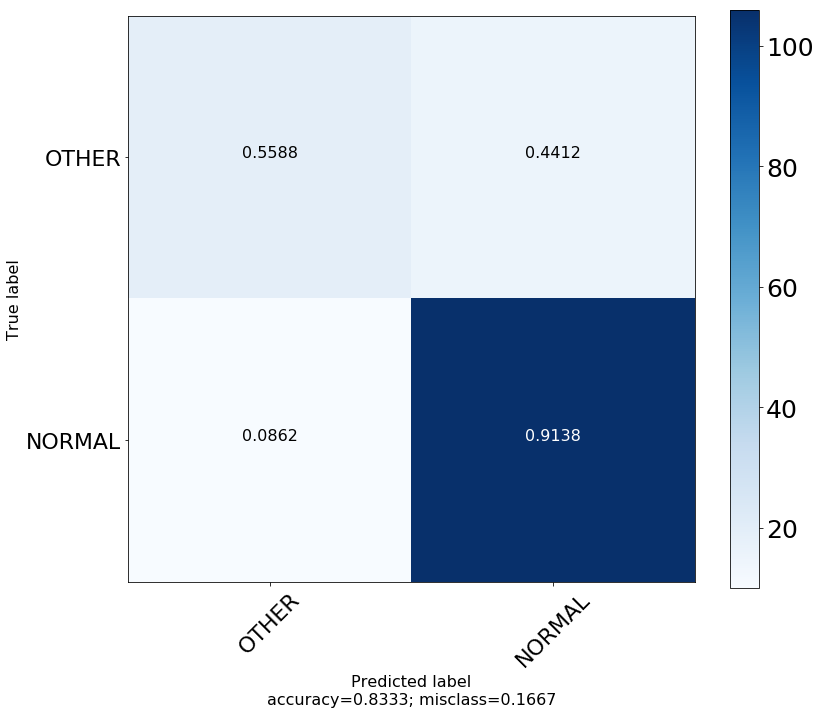

In [91]:
cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm, normalize=True, target_names=["OTHER", "NORMAL"])

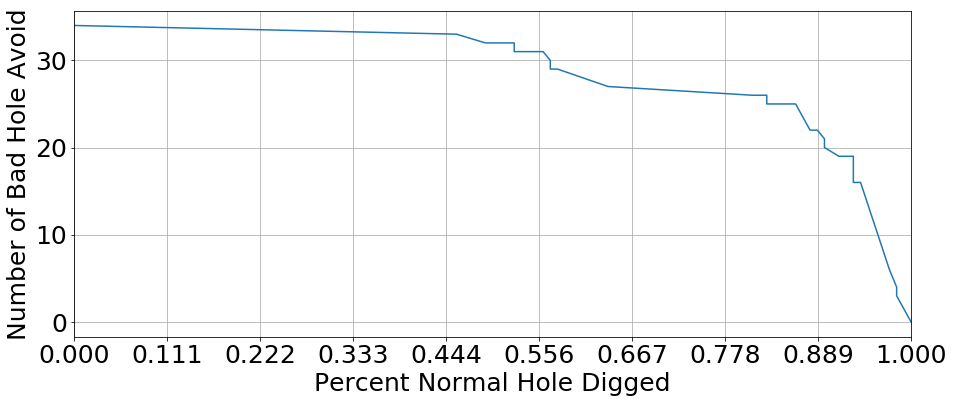

In [118]:
plt.rcParams.update({'font.size': 25})

thresholds = np.linspace(0,1, 2000)
predicted = clf.predict_proba(X_test)
predicted = predicted[:,1]
#print(predicted)

roc = []
for thres in thresholds:
    classified = predicted > thres
    true_pos = np.sum([classified & (y_test==1)])
    false_pos = np.sum([~classified & (y_test!=1)])
    tp = true_pos/np.sum(y_test==1)
    fn = false_pos
    roc.append([tp,fn])

roc = np.array(roc)
plt.figure(figsize=(15,6))
plt.plot(roc[:,0], roc[:,1])
plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel('Percent Normal Hole Digged')
plt.ylabel('Number of Bad Hole Avoid')
plt.xticks(ticks=np.linspace(0,1,10))
plt.grid()
#plt.plot([0.21],[0.78], marker="X", ms= 40, label = "Human")
#plt.legend()
# plt.xlabel(fontsize = 30)



([<matplotlib.axis.YTick at 0x7f4ce820f4a8>,
 <a list of 8 Text yticklabel objects>)

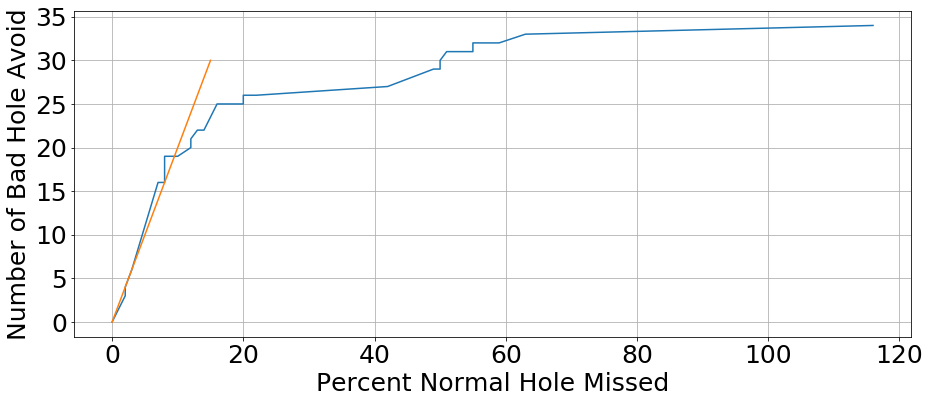

In [125]:
plt.rcParams.update({'font.size': 25})

thresholds = np.linspace(0,1, 2000)
predicted = clf.predict_proba(X_test)
predicted = predicted[:,1]
#print(predicted)

roc = []
for thres in thresholds:
    classified = predicted > thres
    true_pos = np.sum([classified & (y_test==1)])
    false_pos = np.sum([~classified & (y_test!=1)])
    tp = np.sum(y_test==1) - true_pos#/np.sum(y_test==1)
    fn = false_pos
    roc.append([tp,fn])

roc = np.array(roc)
plt.figure(figsize=(15,6))
plt.plot(roc[:,0], roc[:,1])
#plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel('Percent Normal Hole Missed')
plt.ylabel('Number of Bad Hole Avoid')
#plt.xticks(ticks=np.linspace(0,1,10))
plt.grid()
#plt.plot([0.21],[0.78], marker="X", ms= 40, label = "Human")
#plt.legend()
# plt.xlabel(fontsize = 30)
xs = np.linspace(0,15)
ys = 2*xs
plt.plot(xs,ys)
plt.yticks(np.linspace(0,35,8))

## Part 2

In [394]:
df_2.head()

,testid,c,b,f,e,d,a,wellid,depthmd,depthtvdss,...,gr,resist_deep,resist_medium,resist_short,density,neutron,fluidtype,subblock,thickness,mobility
0,14,0,0,0,0,0,0,2,2399.5,2227.325057,...,44.7551,2.5318,2.6355,3.4361,2.2565,0.25493,W,I,9.711914,249.47
1,15,0,0,0,0,0,0,2,2466.0,2279.336933,...,45.7771,2.7585,3.0652,4.1357,2.3057,0.22530,W,I,7.714600,209.71
2,20,1,0,0,0,0,0,2,2783.3,2528.831697,...,44.6048,61.4907,56.0720,40.5391,2.3343,0.19250,O,J,3.217773,63.87
3,21,1,0,0,0,0,0,2,2785.7,2530.706846,...,46.3183,68.5310,53.6928,52.8867,2.3347,0.21244,O,J,3.217773,24.20
4,22,1,0,0,0,0,0,2,2789.2,2533.441439,...,51.9686,26.9497,34.2738,31.1757,2.3823,0.19515,O,J,1.548828,2.12


In [251]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [310]:
names = [
    "LR",
    "RF"
]
classifier_list = [
    LinearRegression(),
    RandomForestRegressor(max_depth=2, max_features=10)
    
]

In [396]:
def compare_plot(predicted, actual): #log predicted vs log actual
    plt.plot(predicted, actual, '.')
    plt.ylim(-2, 10)
    plt.xlim(-2, 10)
    xxs = np.linspace(0,5)
    plt.xlabel('log(predicted)')
    plt.ylabel('log(actual)')
    plt.plot(xxs, xxs)
    
def compare_raw_plot(predicted, actual): #log predicted vs log actual
    plt.plot(predicted, actual, '.')
    plt.ylim(0, np.exp(6))
    plt.xlim(0, np.exp(6))
    xxs = np.linspace(0,np.exp(6))
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.plot(xxs, xxs)
    
def mse_loss(predicted, actual):
    return np.std(predicted - actual)

def plot_residual(predicted, ys, predicted_test, ys_test):
    plt.figure()
    plt.title('Residual of log')
    res = predicted - ys
    plt.hist(res, bins=np.linspace(-8,8, 30), label='Train', density=True, alpha=0.5)
    res_test = predicted_test - ys_test
    plt.hist(res_test, bins=np.linspace(-8,8, 30), density=True, alpha=0.5)
    print('Train Residual', 'mean=', np.mean(res), 'std=', np.std(res))
    print('Test Residual', 'mean=', np.mean(res_test), 'std=', np.std(res_test))
    return res, res_test

In [395]:
cols = ['temp','gr','resist_short','density','neutron','thickness']
reduced = df_2[cols]

train_mask = np.random.random(len(reduced))<0.7
test_mask = ~train_mask

reduced_test = reduced[test_mask]
reduced = reduced[train_mask]

target = df_2.mobility[train_mask]
target_test = df_2.mobility[test_mask]

train loss 1.5960519515283216
[('w0', 37.72664356844057), ('temp', -5.361183024903912), ('gr', -2.0705155823992394), ('resist_short', 0.0799468275462706), ('density', 0.4201724232442522), ('neutron', 1.7146737260922704), ('thickness', 0.3565395019748706)]
test loss 1.6221604038754784
train raw loss 209.75589448039867
test raw loss 235.04193241865218
Train Residual mean= -2.7112542762099904e-08 std= 1.5960519515283216
Test Residual mean= -0.03960182058425555 std= 1.6221604038754784
5.064018833221188
Expected Offset5.064018833221188times


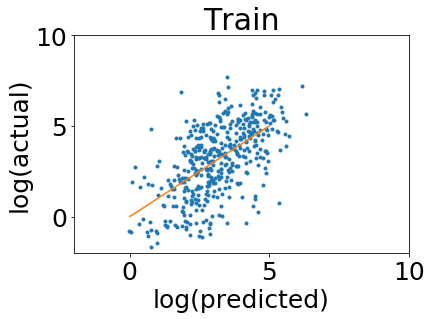

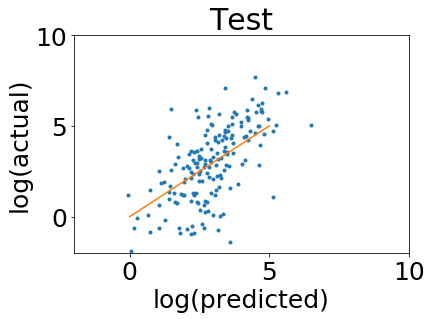

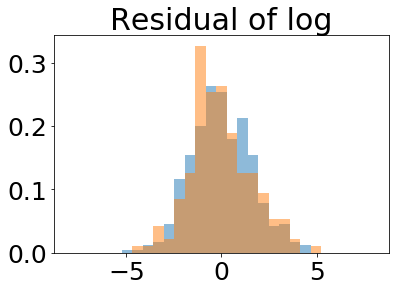

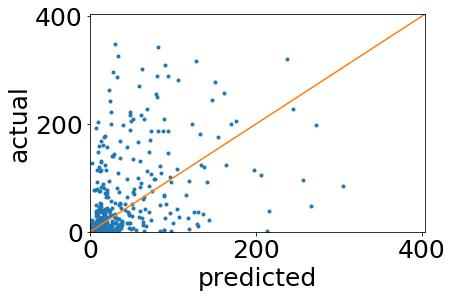

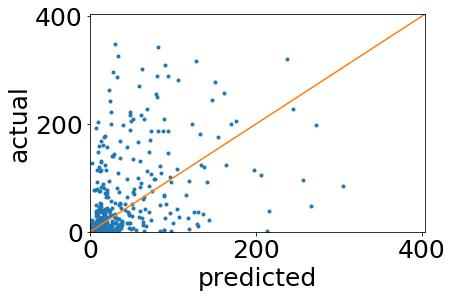

In [397]:
def prepare(original):    
    xs = np.log(original)
    padder = [[1]]*len(xs)
    xs = np.hstack((padder, xs))
    return xs



xs = prepare(reduced.values)
ys = np.log(target.values)

def cost(w):
    return np.sum((ys - np.dot(xs, w))**2)

nw = len(xs[0])

from scipy.optimize import minimize
np.random.seed(999)
res = minimize(cost, np.random.randn(nw))

predicted = np.dot(xs, res.x)
plt.title('Train')
compare_plot(predicted, ys)

print('train loss', mse_loss(predicted, ys))

plt.figure()
ys_test = np.log(target_test.values)
xs_test = prepare(reduced_test)
predicted_test = np.dot(xs_test, res.x)
print(list(zip(['w0']+cols, res.x)))

print('test loss', mse_loss(predicted_test, ys_test))
plt.title('Test')
compare_plot(predicted_test, ys_test)

print('train raw loss', mse_loss(np.exp(predicted), np.exp(ys)))
print('test raw loss', mse_loss(np.exp(predicted_test), np.exp(ys_test)))

res, res_test = plot_residual(predicted, ys, predicted_test, ys_test)
print(np.exp(np.std(res_test)))

print('Expected Offset'+ repr(np.exp(np.std(res_test))) + 'times')

plt.figure()
compare_raw_plot(np.exp(predicted), np.exp(ys)) #log predicted vs log actual
plt.figure()
compare_raw_plot(np.exp(predicted), np.exp(ys)) 

In [312]:
from sklearn.metrics import mean_squared_error

for name, clf in zip(names, classifier_list):
    print (name)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    print (mean_squared_error(y_test, pred_test))
    print (" ")

LR
22832.591465868572
 
RF
19086.76830189094
 


/home/sanchit/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


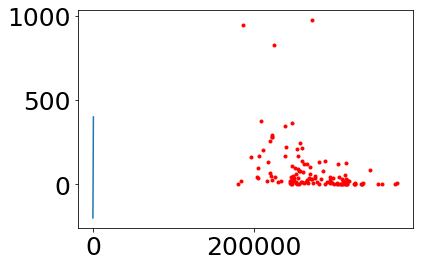

In [326]:
plt.plot(pred_test, y_test, '.r')
xs = np.linspace(-200,400,100)
plt.plot(xs,xs)

In [47]:
attr = ["temp", "gr", "resist_deep", "density", "neutron", "thickness"]

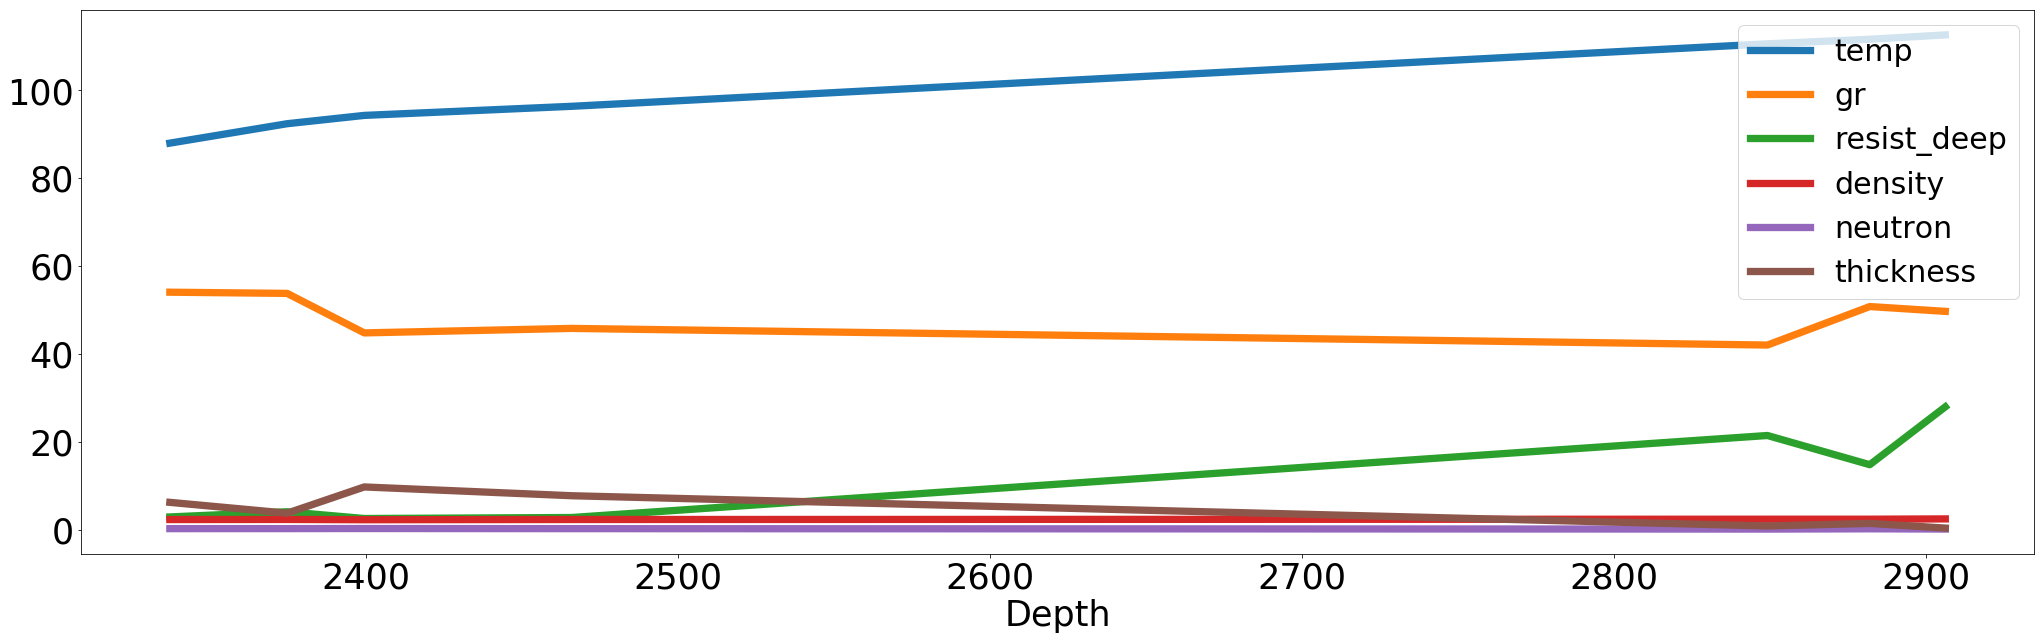

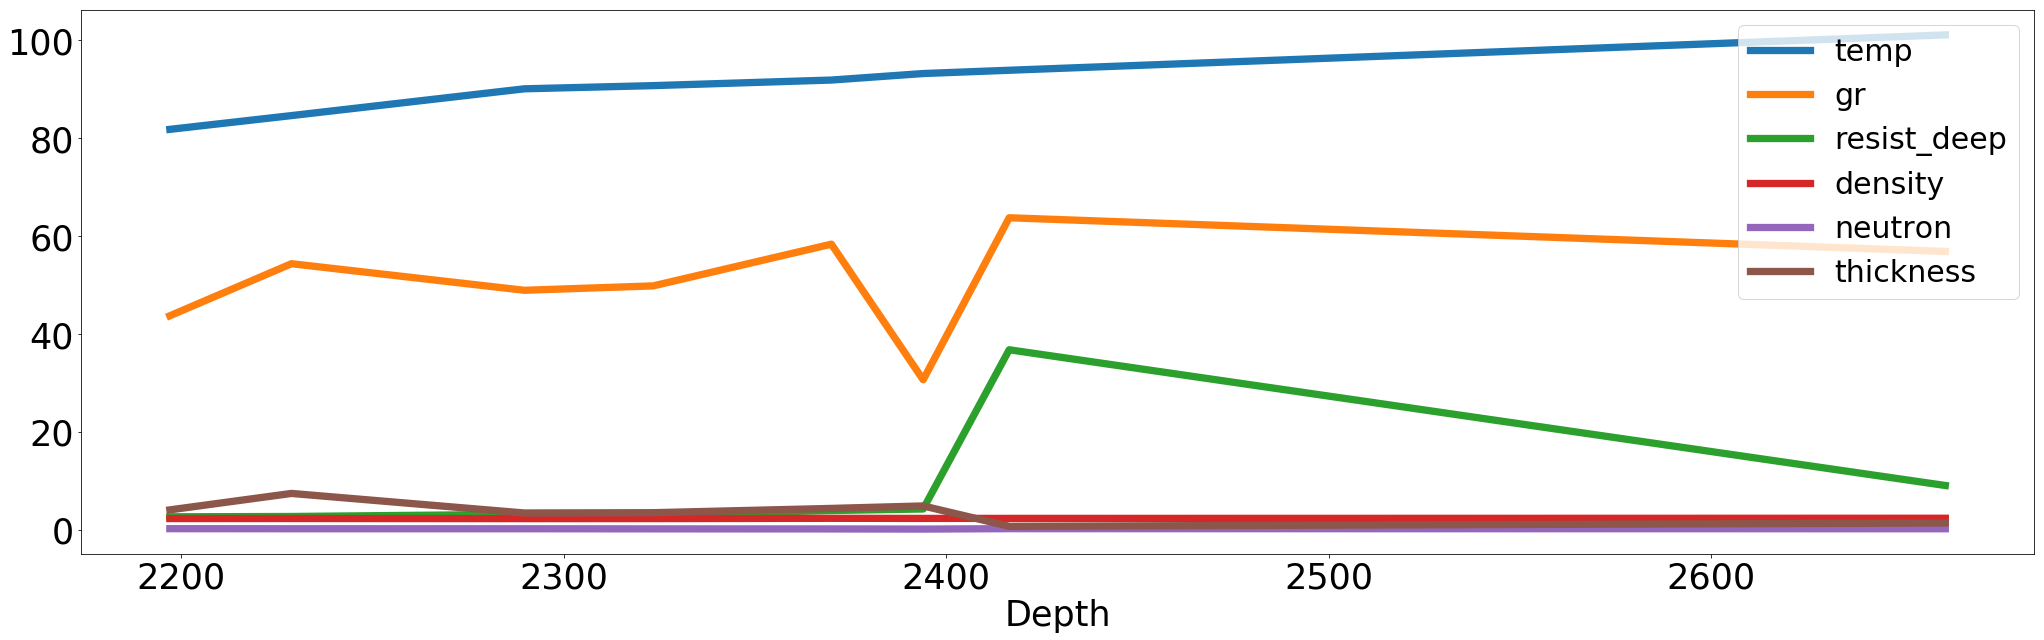

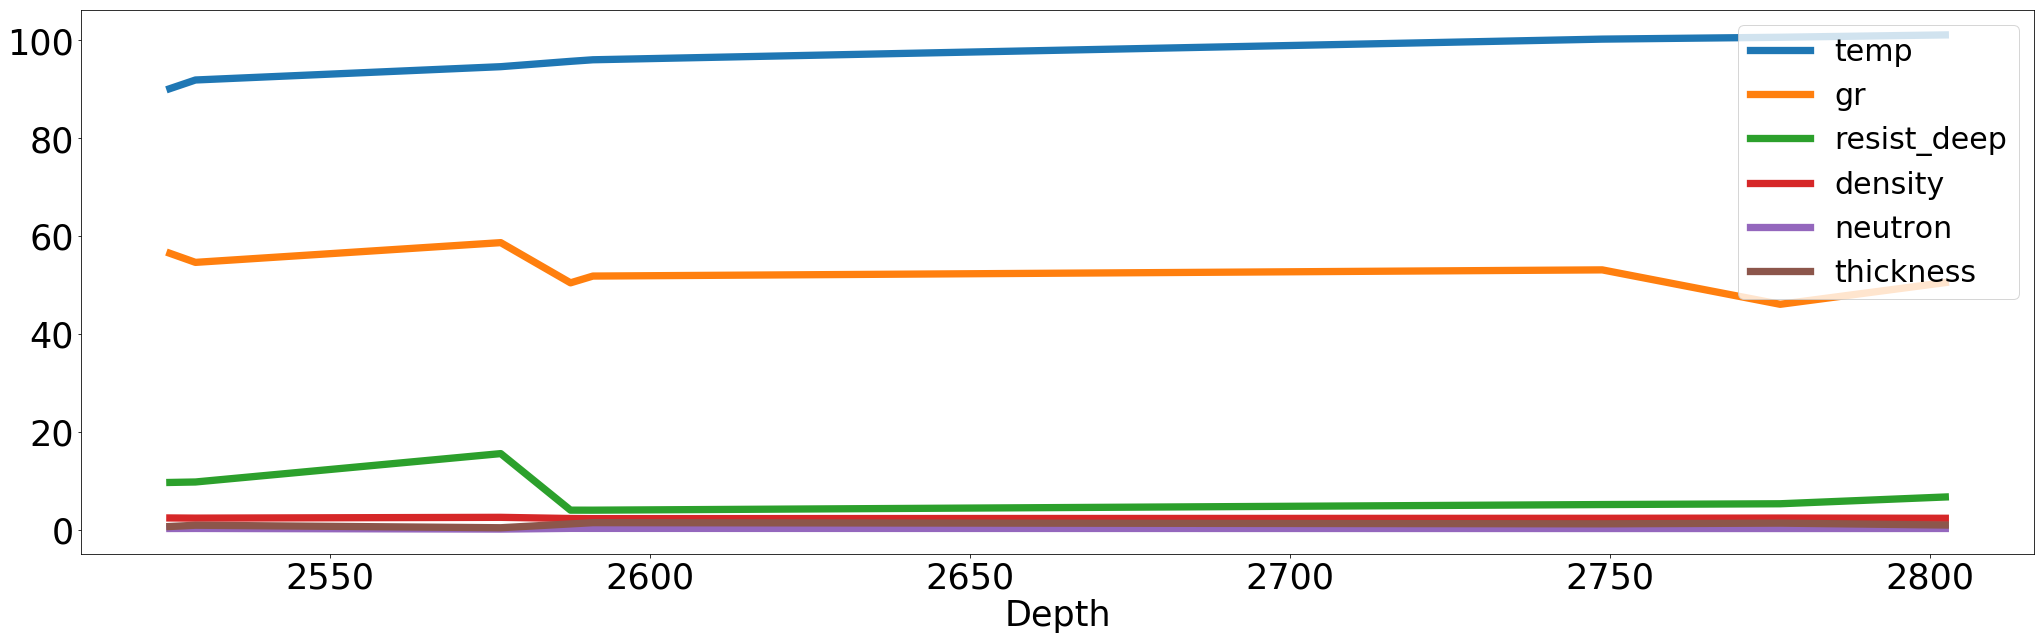

In [48]:
plt.rcParams.update({'font.size': 35})
for j in range (2, 5):
    plt.figure(figsize=(35, 10))
    for i in attr:
        tes = df[df['wellid']==j].sort_values('depthmd')
        plt.plot(tes["depthmd"], tes[i], label = i, linewidth=7.3)
    plt.legend(prop={'size': 30}, loc = 1)
    plt.xlabel("Depth")
    plt.savefig(str(i) + str(j)+".png")